Estimate: 0.9999999496914257
Exact: 1.0560338711276407


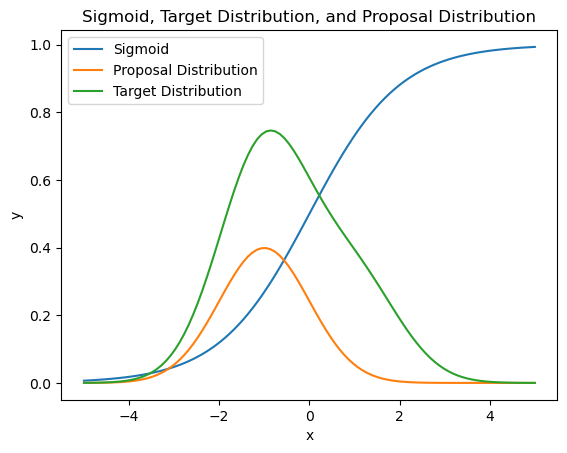

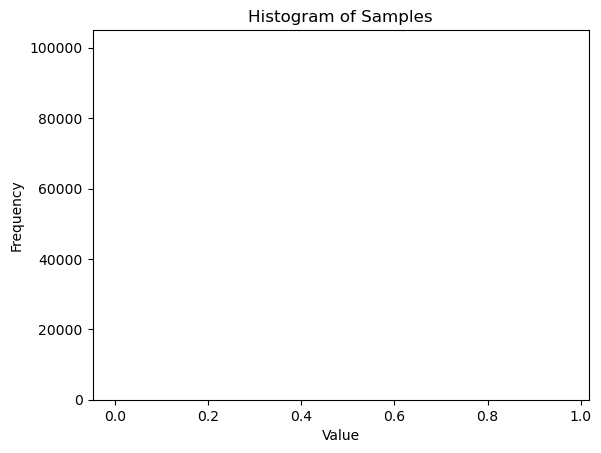

In [28]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

np.random.seed(42)

# Define the lower and upper bounds of the integral
lower_bound = -5
upper_bound = 5

# Define the target distribution (Mixture of Gaussians)
def target_distribution(x):
    return 0.3 * np.exp(-0.5 * (x - 1)**2) + 0.7 * np.exp(-0.5 * (x + 1)**2)

# Define the proposal distribution (Gaussian distribution)
def proposal_distribution(x):
    return np.exp(-0.5 * (x+1)**2) / np.sqrt(2 * np.pi)

# Define the importance sampling function
def importance_sampling(num_samples):
    samples = np.random.normal(-5, 5, num_samples)  # Generate samples from the proposal distribution
    weights = target_distribution(samples) / proposal_distribution(samples)  # Compute the importance weights
    weights /= np.sum(weights)  # Normalize the weights

    # Estimate the expectation of a function using importance sampling
    def estimate_expectation(func):
        return np.sum(func(samples) * weights)

    return estimate_expectation

np.random.seed(42)

def importance_sampling_samples(num_samples):
    samples = np.random.normal(-5, 5, num_samples)  # Generate samples from the proposal distribution
    weights = target_distribution(samples) / proposal_distribution(samples)  # Compute the importance weights
    weights /= np.sum(weights)  # Normalize the weights

    # Estimate the expectation of a function using importance sampling
    def estimate_expectation(func):
        return func(samples) * weights

    return estimate_expectation

def combined(x):
    return target_distribution(x)*sigmoid(x)

# Define the exact solution
def exact_solution():
    return quad(combined, lower_bound, upper_bound)[0]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perform importance sampling with 10000 samples
estimate = importance_sampling(100000)(sigmoid)
exact = exact_solution()
samples = importance_sampling_samples(100000)(sigmoid)

print('Estimate:', estimate)
print('Exact:', exact)

# Print the estimates
x = np.linspace(lower_bound, upper_bound, 100)  # Define "x" as an array of values
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, proposal_distribution(x), label='Proposal Distribution')
plt.plot(x, target_distribution(x), label='Target Distribution')



# Set the title and labels
plt.title('Sigmoid, Target Distribution, and Proposal Distribution')
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Show the plot
plt.show()
